In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [2]:
data=pd.read_csv('/home/sachingpt/ML-Project/notebook/StudentsPerformance.csv')

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
X=data.drop('math score',axis=1)

In [5]:
y=data['math score']

In [6]:
#Create column transformers with 3 types of transformers
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
numeric_features =X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('OneHotEncoder', categorical_transformer, categorical_features),
        ('StandardScaler', numeric_transformer, numeric_features),
    ])

In [7]:
X=preprocessor.fit_transform(X)

In [8]:
X.shape

(1000, 19)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 19), (200, 19), (800,), (200,))

In [10]:
def evaluate_model(true,predicted):
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    mae = mean_absolute_error(true, predicted)
    return rmse, r2, mae


In [11]:
models={
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'Support Vector Regressor': SVR(),
    'CatBoost Regressor': CatBoostRegressor(verbose=0),
    'XGBoost Regressor': XGBRegressor(eval_metric='rmse')
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_r2, model_train_rmse = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_r2, model_test_rmse = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Performance on Train Data:')
    print(f'MAE: {model_train_mae}, R2: {model_train_r2}, RMSE: {model_train_rmse}')
    print('Model Performance on Test Data:')
    print(f'MAE: {model_test_mae}, R2: {model_test_r2}, RMSE: {model_test_rmse}')
    print('-----------------------------------')
    r2_list.append(model_test_r2)

    print('='*50)
    print('\n')

    

Linear Regression
Model Performance on Train Data:
MAE: 5.323050852720514, R2: 0.8743172040139593, RMSE: 4.266711846071957
Model Performance on Test Data:
MAE: 5.393993869732844, R2: 0.8804332983749564, RMSE: 4.214763142474852
-----------------------------------


Ridge Regression
Model Performance on Train Data:
MAE: 5.323324922741654, R2: 0.8743042615212909, RMSE: 4.264987823725981
Model Performance on Test Data:
MAE: 5.390387016935638, R2: 0.8805931485028738, RMSE: 4.211100688014259
-----------------------------------


Lasso Regression
Model Performance on Train Data:
MAE: 6.593815587795566, R2: 0.8071462015863456, RMSE: 5.206302661246526
Model Performance on Test Data:
MAE: 6.519694535667419, R2: 0.8253197323627853, RMSE: 5.157881810347763
-----------------------------------


Decision Tree Regressor
Model Performance on Train Data:
MAE: 0.2795084971874737, R2: 0.9996534669718089, RMSE: 0.01875
Model Performance on Test Data:
MAE: 8.023714850367003, R2: 0.7354301663855767, RMSE: 6

Random Forest Regressor
Model Performance on Train Data:
MAE: 2.299644607204436, R2: 0.9765428064214009, RMSE: 1.8225291666666663
Model Performance on Test Data:
MAE: 5.937660791974863, R2: 0.8551161030048872, RMSE: 4.6088249999999995
-----------------------------------


AdaBoost Regressor
Model Performance on Train Data:
MAE: 5.78924250833782, R2: 0.85133864464722, RMSE: 4.735657200704193
Model Performance on Test Data:
MAE: 6.145280177092872, R2: 0.8448067857149936, RMSE: 4.760679686652031
-----------------------------------


Support Vector Regressor
Model Performance on Train Data:
MAE: 6.57700724251018, R2: 0.8081281585902299, RMSE: 4.869189452384868
Model Performance on Test Data:
MAE: 8.126623218622633, R2: 0.7286001513223705, RMSE: 5.4015392444969965
-----------------------------------


CatBoost Regressor
Model Performance on Train Data:
MAE: 3.042664195326799, R2: 0.9589358676277713, RMSE: 2.405393926779502
Model Performance on Test Data:
MAE: 6.008631956907363, R2: 0.851631

In [12]:
pd.DataFrame({'Model': model_list, 'R2 Score': r2_list}).sort_values(by='R2 Score', ascending=False)

,Model,R2 Score
1,Ridge Regression,0.880593
0,Linear Regression,0.880433
4,Random Forest Regressor,0.855116
7,CatBoost Regressor,0.851632
5,AdaBoost Regressor,0.844807
8,XGBoost Regressor,0.827797
2,Lasso Regression,0.825320
3,Decision Tree Regressor,0.735430
6,Support Vector Regressor,0.728600


In [13]:
#We are going with Linear Regression as it has the highest R2 score
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(X_train, y_train)
y_pred=linear_model.predict(X_test)
score=r2_score(y_test, y_pred)*100
print(f'Accuracy of Linear Regression Model: {score:.2f}%')

Accuracy of Linear Regression Model: 88.04%


Text(0.5, 1.0, 'Actual vs Predicted Values')

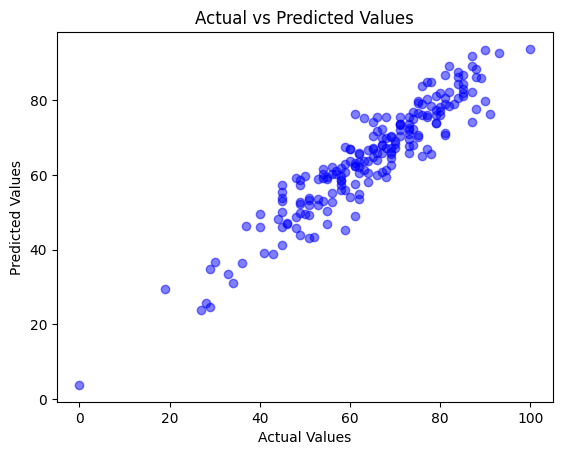

In [14]:
#Plot y_pred and y_test
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

<Axes: xlabel='math score'>

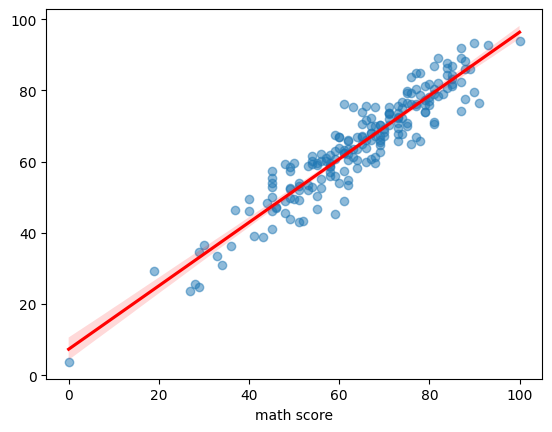

In [15]:
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

In [16]:
#Difference between y_test and y_pred
diff =pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
diff['Difference'] = diff['y_test'] - diff['y_pred']

In [17]:
print(diff.head())

     y_test     y_pred  Difference
521      91  76.387970   14.612030
737      53  58.885970   -5.885970
740      80  76.990265    3.009735
660      74  76.851804   -2.851804
411      84  87.627378   -3.627378
